# Modeling features of the C. elegans life cycle

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Modeling  C. elegans growth rate vs. temperature

In [104]:
T = np.array([16, 20, 25])
stages = ['L0 (0)', 'L1 (1)', 'L2 (2)', 'L3 (3)', 'L4 (4)', 'Rep (5)', 'Rep-EB (6)', 'Rep-EM (7)', 'Rep-EE (8)']
growth_data = np.array([[0, 17, 36.5, 48, 60, 75, 90, 140, 180], 
                        [0, 11, 26, 34.5, 43.5, 56, 65, 96, 128], 
                        [0, 8.5, 18, 25.5, 31, 39, 47, 62, 88]])

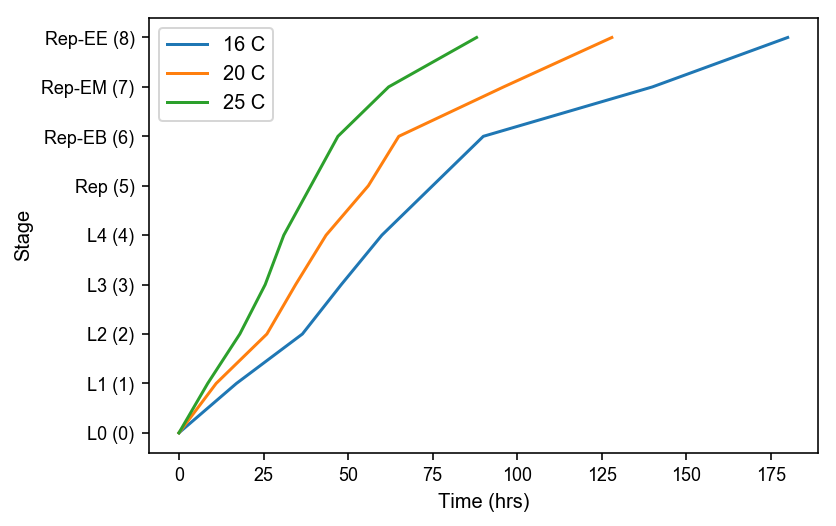

In [105]:
fig, ax = plt.subplots()
for t, data in zip(T, growth_data):
    ax.plot(data, range(len(data)), label=str(t) + ' C')
ax.set_yticks(range(len(data)))
ax.set_yticklabels(stages)
ax.set_ylabel('Stage')
ax.set_xlabel('Time (hrs)')
ax.legend(loc='upper left')

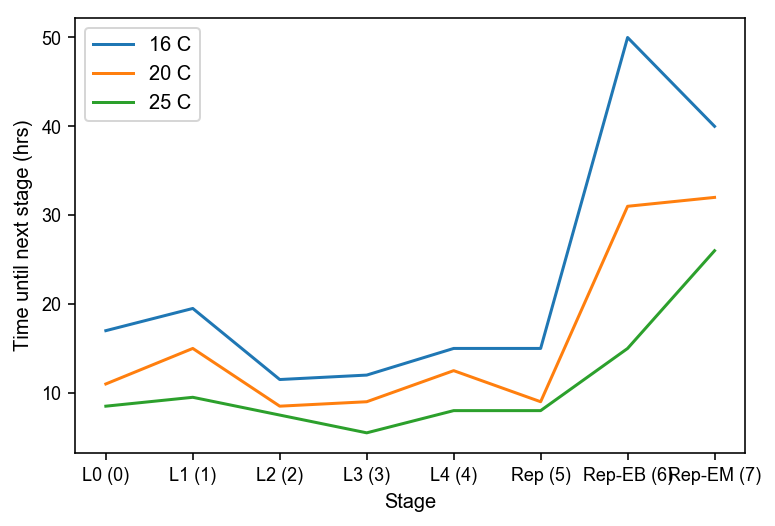

In [107]:
fig, ax = plt.subplots()
for t, data in zip(T, growth_data):
    diffs = data[1:] - data[:-1]
    ax.plot(range(len(diffs)), diffs, label=str(t) + ' C')
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Time until next stage (hrs)')
ax.legend(loc='upper left')

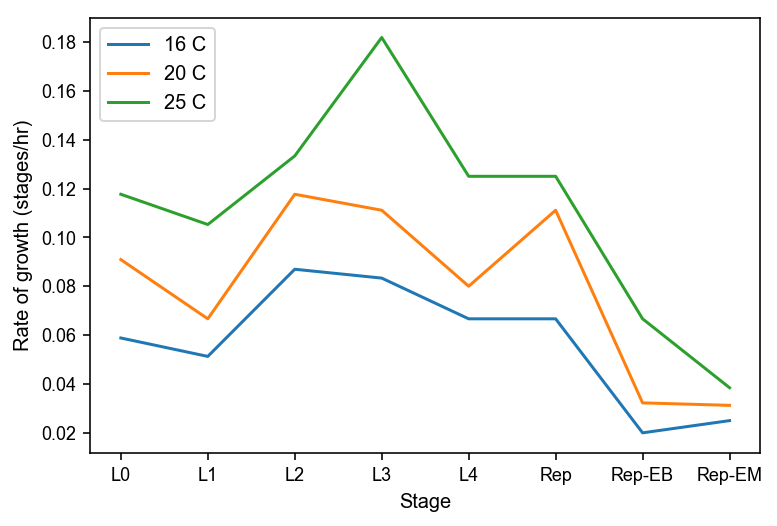

In [62]:
fig, ax = plt.subplots()
for t, data in zip(T, growth_data):
    diffs = data[1:] - data[:-1]
    ax.plot(range(len(diffs)), 1/diffs, label=str(t) + ' C')
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Rate of growth (stages/hr)')
ax.legend(loc='upper left')

Text(0, 0.5, 'Time (hrs)')

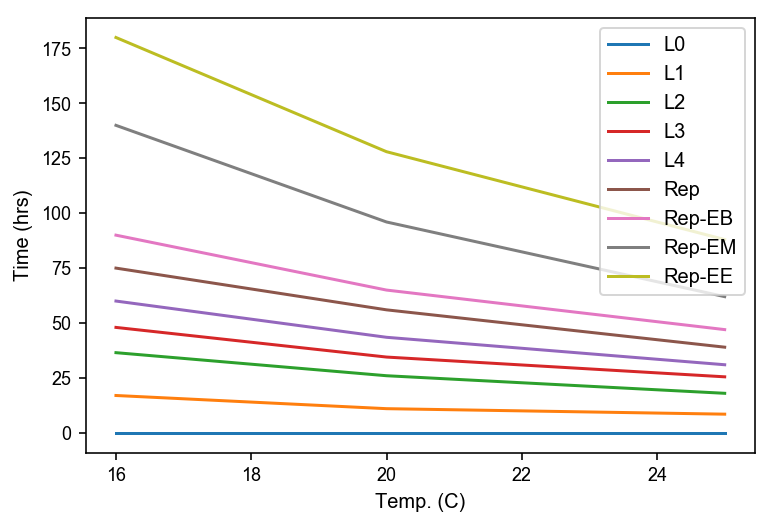

In [80]:
fig, ax = plt.subplots()
for i, stage in enumerate(stages):
    ax.plot(T, growth_data[:,i], label=stage)
ax.legend(loc='upper right')
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Time (hrs)')

Text(0, 0.5, 'Time until next stage (hrs)')

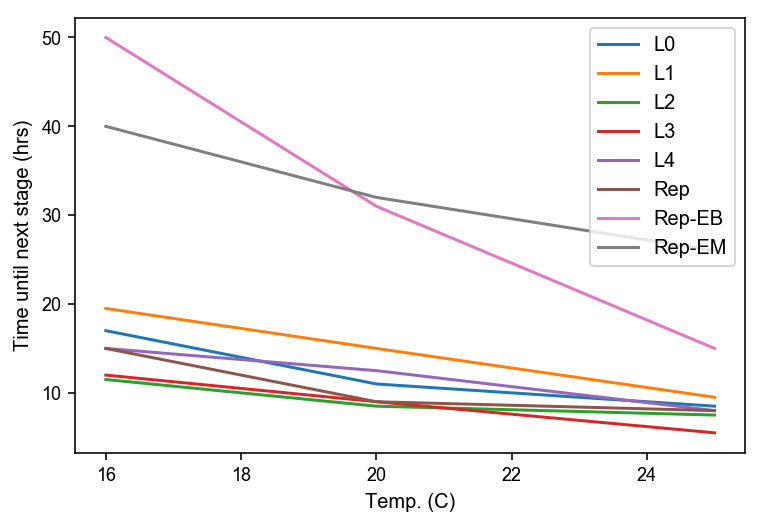

In [78]:
fig, ax = plt.subplots()
for i, stage in enumerate(stages[:-1]):
    diff = growth_data[:,i+1] - growth_data[:,i]
    ax.plot(T, diff, label=stage)
ax.legend(loc='upper right')
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Time until next stage (hrs)')

In [69]:
growth_data[:,3] - growth_data[:,2]

array([40., 32., 26.])

In [85]:
def hours_until_next_stage(stage, T):
    return 10

def growth_rate(stage, T):
    return 1. / hours_until_next_stage(stage, T)

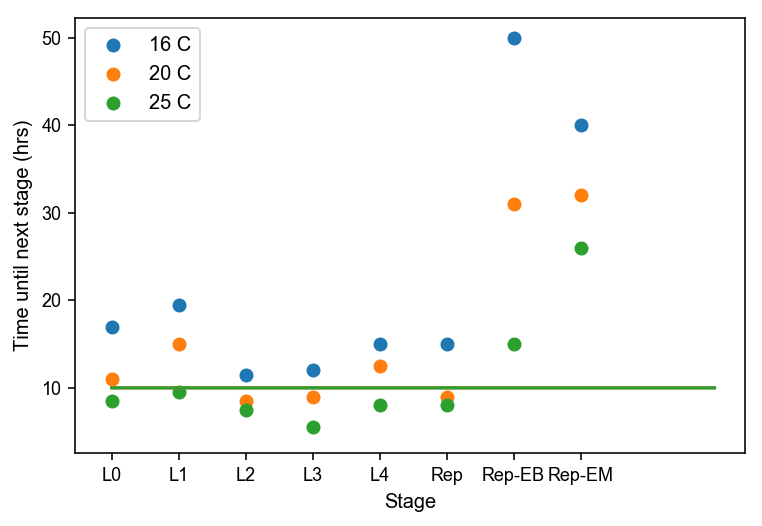

In [90]:
fig, ax = plt.subplots()
for t, data in zip(T, growth_data):
    diffs = data[1:] - data[:-1]
    ax.scatter(range(len(diffs)), diffs, label=str(t) + ' C')
    S_c = np.arange(0, len(stages), .0001)
    ax.plot(S_c, [hours_until_next_stage(t, s) for s in S_c])
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Time until next stage (hrs)')
ax.legend(loc='upper left')

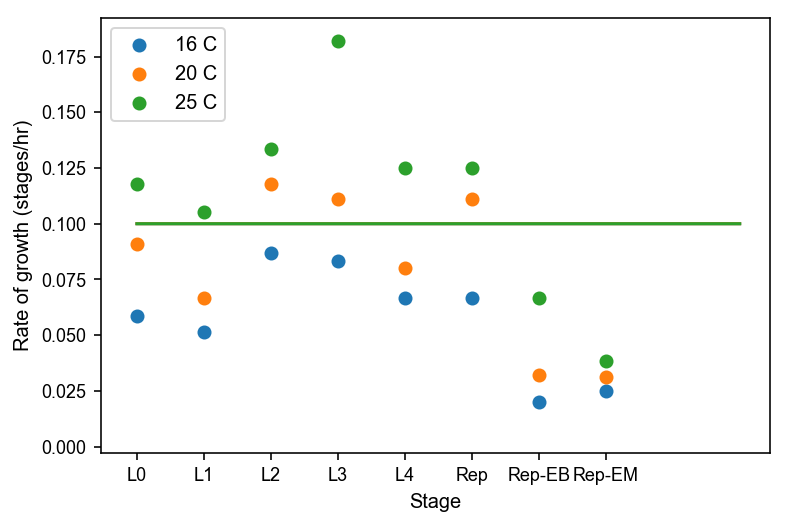

In [91]:
fig, ax = plt.subplots()
for t, data in zip(T, growth_data):
    diffs = data[1:] - data[:-1]
    ax.scatter(range(len(diffs)), 1/diffs, label=str(t) + ' C')
    S_c = np.arange(0, len(stages), .0001)
    ax.plot(S_c, [growth_rate(t, s) for s in S_c])
ax.set_xticks(range(len(diffs)))
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Rate of growth (stages/hr)')
ax.legend(loc='upper left')

Text(0, 0.5, 'Time until next stage (hrs)')

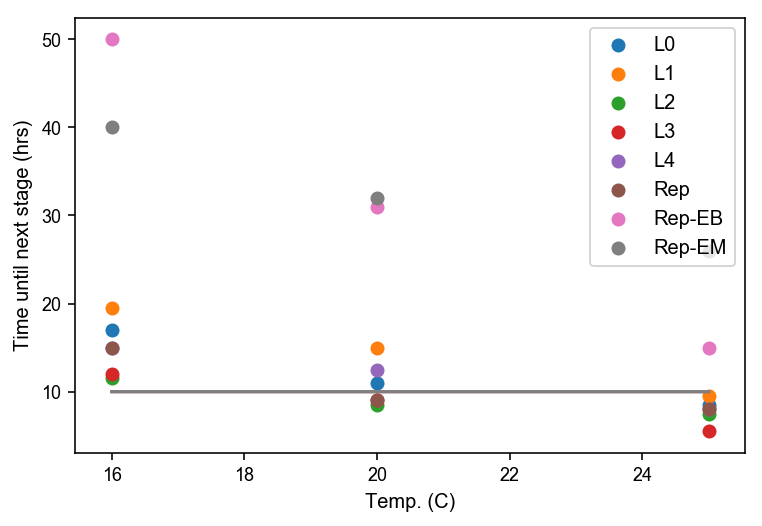

In [87]:
fig, ax = plt.subplots()
for i, stage in enumerate(stages[:-1]):
    diff = growth_data[:,i+1] - growth_data[:,i]
    ax.scatter(T, diff, label=stage)
    T_c = np.arange(np.min(T), np.max(T), .0001)
    ax.plot(T_c, [hours_until_next_stage(i, t) for t in T_c])
ax.legend(loc='upper right')
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Time until next stage (hrs)')

## Modeling C. elegans dauers probability vs. density and temperature

In [93]:
T = np.array([15, 20, 25, 17])
pher = np.array([0, 2, 8, 30])
dauers_data = np.array([[0, 0.20, 0.68, 0.90], 
                        [0, 0.05, 0.72, 0.92],
                        [0, 0.35, 0.80, 0.95],
                        [0, 0.95, 0.95, 0.97]])

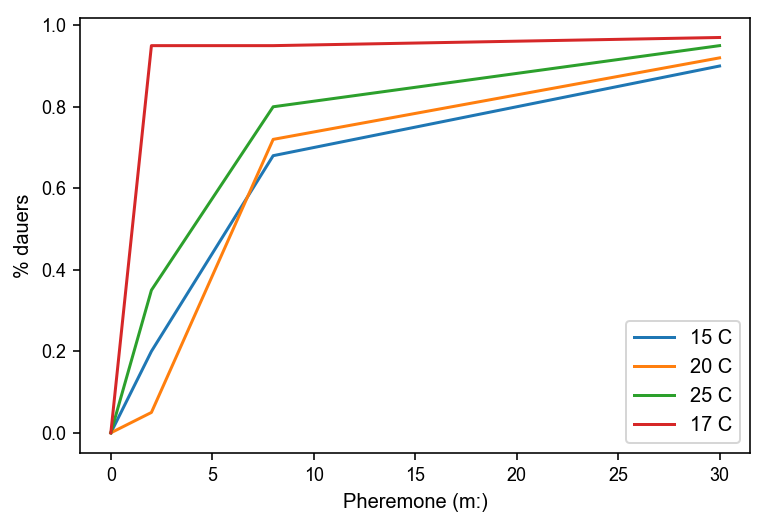

In [99]:
fig, ax = plt.subplots()
for t, data in zip(T, dauers_data):
    ax.plot(pher, data, label=str(t) + ' C')
ax.set_xlabel('Pheremone (m:)')
ax.set_ylabel('% dauers')
ax.legend(loc='lower right')

In [102]:
def p_dauers(T, pher):
    return 0.2

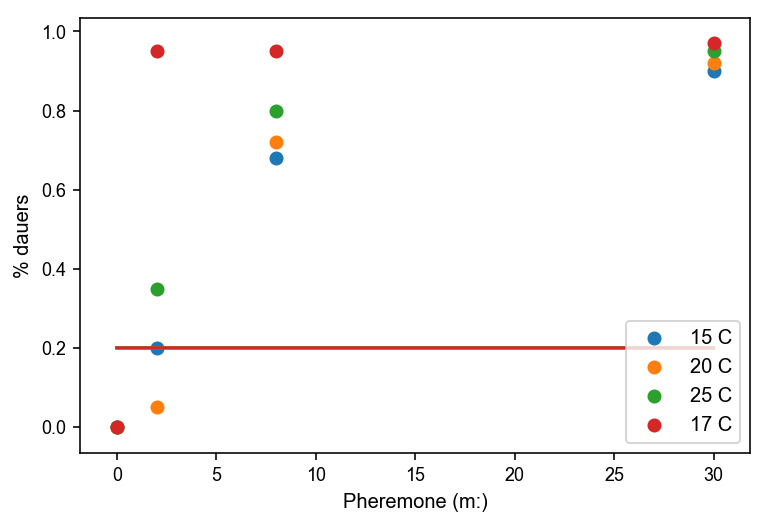

In [103]:
fig, ax = plt.subplots()
for t, data in zip(T, dauers_data):
    ax.scatter(pher, data, label=str(t) + ' C')
    pher_c = np.arange(np.min(pher), np.max(pher), 0.01)
    ax.plot(pher_c, [p_dauers(T, p) for p in pher_c])
ax.set_xlabel('Pheremone (m:)')
ax.set_ylabel('% dauers')
ax.legend(loc='lower right')

## Modeling C. elegans birth rate & number of eggs vs. temperature

In [120]:
T = [16, 20, 25]
max_obs_rate = [5.4, 9.1, 8.1]
total_eggs = [275, 280, 170]

Text(0, 0.5, 'Total eggs laid (#)')

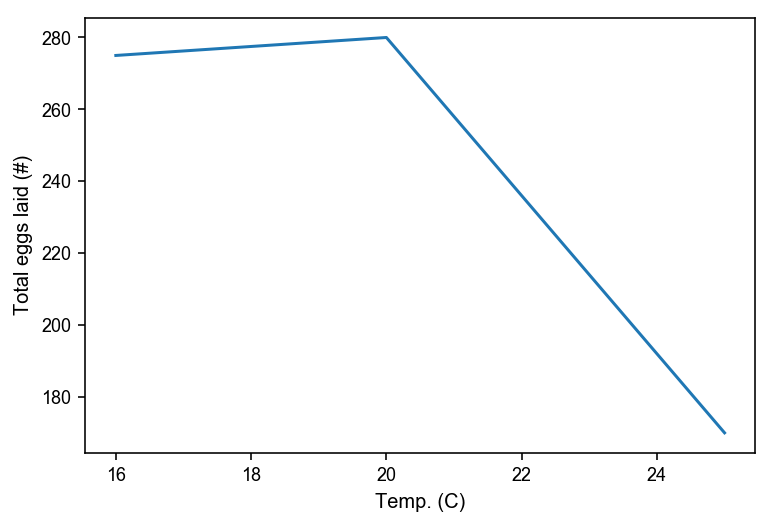

In [114]:
fig, ax = plt.subplots()
ax.plot(T, total_eggs)
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Total eggs laid (#)')

Text(0, 0.5, 'Max. egg laying rate (#/hr)')

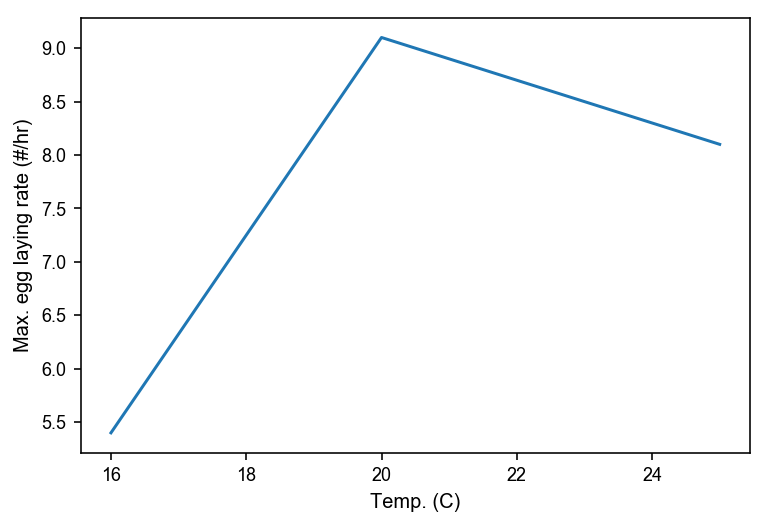

In [121]:
fig, ax = plt.subplots()
ax.plot(T, max_obs_rate)
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Max. egg laying rate (#/hr)')

In [124]:
def n_eggs(T):
    return 200.

def max_rate(T):
    return 8.0

# Note egg laying begins at stage 6, maxes at 7, and stops by 8
def egg_rate(stage, T):
    return 0.1

Text(0, 0.5, 'Total eggs laid (#)')

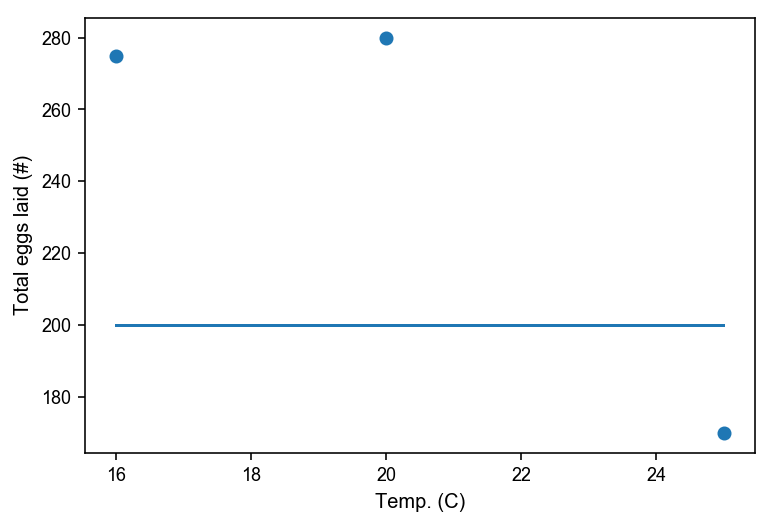

In [125]:
fig, ax = plt.subplots()
ax.scatter(T, total_eggs)
T_c = np.arange(np.min(T), np.max(T), 0.01)
ax.plot(T_c, [n_eggs(t) for t in T_c])
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Total eggs laid (#)')

Text(0, 0.5, 'Max. egg laying rate (#/hr)')

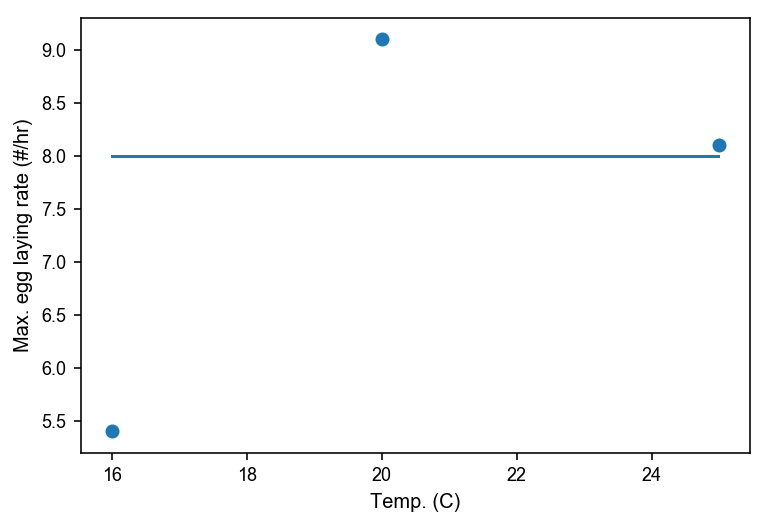

In [126]:
fig, ax = plt.subplots()
ax.scatter(T, max_obs_rate)
T_c = np.arange(np.min(T), np.max(T), 0.01)
ax.plot(T_c, [max_rate(t) for t in T_c])
ax.set_xlabel('Temp. (C)')
ax.set_ylabel('Max. egg laying rate (#/hr)')